# Statistical Methods Project

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# EDA (data description, data preprocessing)

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/ov3ipo/SM_Project/main/life_expectancy.csv")
# remove trailing space in columns name and format display function
pd.options.display.float_format = '{:.4f}'.format
df = df.rename(columns=lambda x: x.strip())

# overview on data statistic
display(df.head(10))
display(df.info())

# get quantitative and qualitative data
numeric_cols = df.drop(columns=["Status", "Country"], axis=1).columns

,Country,Year,Status,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,...,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
0,Afghanistan,2015,Developing,65.0000,263.0000,62,0.0100,71.2796,65.0000,1154,...,6.0000,8.1600,65.0000,0.1000,584.2592,33736494.0000,17.2000,17.3000,0.4790,10.1000
1,Afghanistan,2014,Developing,59.9000,271.0000,64,0.0100,73.5236,62.0000,492,...,58.0000,8.1800,62.0000,0.1000,612.6965,327582.0000,17.5000,17.5000,0.4760,10.0000
2,Afghanistan,2013,Developing,59.9000,268.0000,66,0.0100,73.2192,64.0000,430,...,62.0000,8.1300,64.0000,0.1000,631.7450,31731688.0000,17.7000,17.7000,0.4700,9.9000
3,Afghanistan,2012,Developing,59.5000,272.0000,69,0.0100,78.1842,67.0000,2787,...,67.0000,8.5200,67.0000,0.1000,669.9590,3696958.0000,17.9000,18.0000,0.4630,9.8000
4,Afghanistan,2011,Developing,59.2000,275.0000,71,0.0100,7.0971,68.0000,3013,...,68.0000,7.8700,68.0000,0.1000,63.5372,2978599.0000,18.2000,18.2000,0.4540,9.5000
5,Afghanistan,2010,Developing,58.8000,279.0000,74,0.0100,79.6794,66.0000,1989,...,66.0000,9.2000,66.0000,0.1000,553.3289,2883167.0000,18.4000,18.4000,0.4480,9.2000
6,Afghanistan,2009,Developing,58.6000,281.0000,77,0.0100,56.7622,63.0000,2861,...,63.0000,9.4200,63.0000,0.1000,445.8933,284331.0000,18.6000,18.7000,0.4340,8.9000
7,Afghanistan,2008,Developing,58.1000,287.0000,80,0.0300,25.8739,64.0000,1599,...,64.0000,8.3300,64.0000,0.1000,373.3611,2729431.0000,18.8000,18.9000,0.4330,8.7000
8,Afghanistan,2007,Developing,57.5000,295.0000,82,0.0200,10.9102,63.0000,1141,...,63.0000,6.7300,63.0000,0.1000,369.8358,26616792.0000,19.0000,19.1000,0.4150,8.4000
9,Afghanistan,2006,Developing,57.3000,295.0000,84,0.0300,17.1715,64.0000,1990,...,58.0000,7.4300,58.0000,0.1000,272.5638,2589345.0000,19.2000,19.3000,0.4050,8.1000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10  BMI                              2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

None

## Data description

### Univariate

#### Qualitative

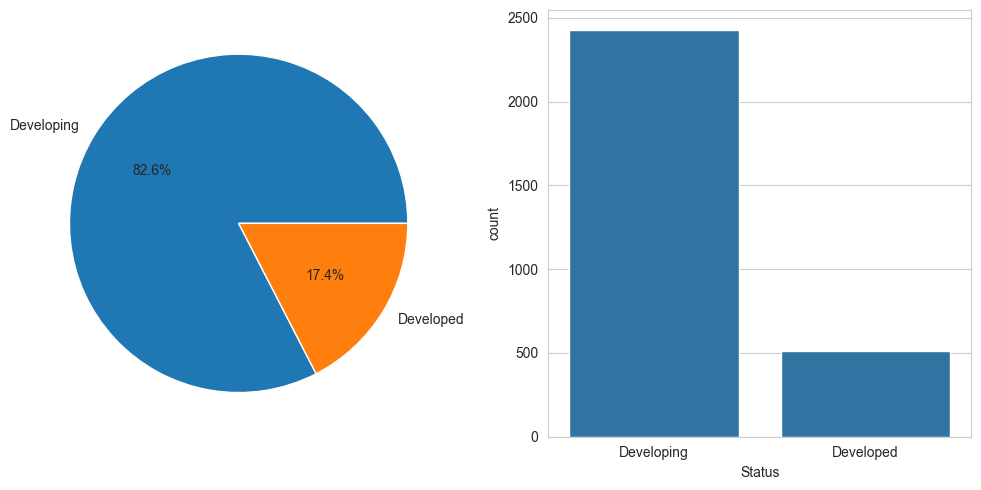

In [3]:
plt.figure(figsize = (10,5))
plt.subplot(1, 2, 1)
x = df['Status'].value_counts().reset_index()
plt.pie(x=x['count'], labels=x['Status'], autopct="%0.1f%%")
plt.subplot(1, 2, 2)
sns.countplot(df, x="Status")
plt.tight_layout()
plt.show()

``` {markdown}
Remark:
- Why didn't we consider the Country col in this case?
    + Categorical variable: the "Status" column represent a categorical variable, which is ideal for qualitative analysis.
    + Comparison and Analysis: using this column, one can compare other quantitative metrics (Life expectancy, GDP, etc) between developed and developing countries, allowing for insightful analyses on how development status affects various health and economic indicators.
    + Simple and Interpretative: making any audience to understand easily.
- State what you see in the chart
- Pie chart: This chart shows the proportion of countries classified as "Developing" and "Developed". About 82.6% of the entries in the dataset are classified as "Developing" and 17.4% as "Developed". The large section in blue represents developing countries, while the smaller section in orange represents developed countries.
- Bar chart: This chart displays the count of countries classified as "Developing" versus "Developed". It visually confirms the numbers seen in the pie chart, with a significantly higher count of developing countries compared to developed countries. The height of the bars indicates the count of countries in each category, reinforcing the disparity in number.
```

#### Quantitative

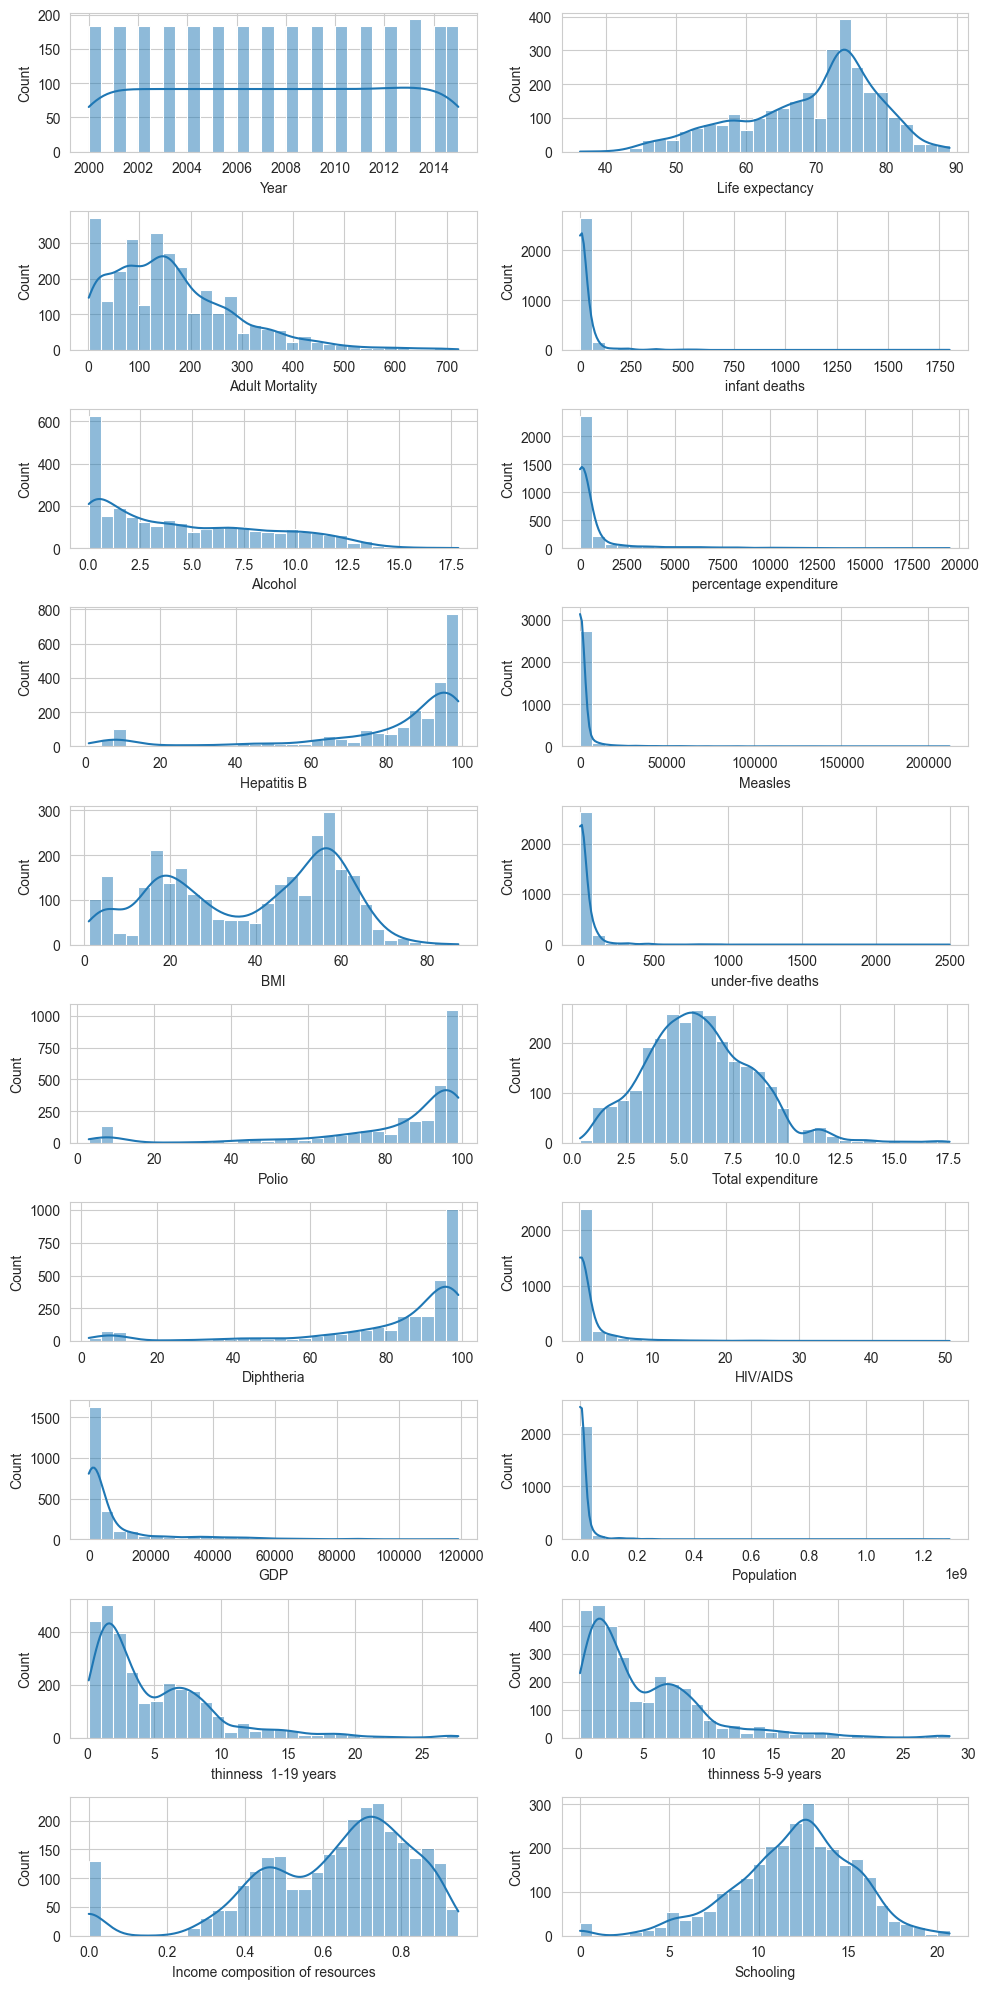

In [4]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i + 1)
    sns.histplot(df, x=col, bins=30, kde=True)
plt.tight_layout()
plt.show()

``` {markdown}
Remark:
- State what you see in the chart
    + Yearly Data: The number of entries per year from 2000 to 2014 is fairly consistent, slightly decreasing over time.
    + Adult Mortality: This histogram shows a skewed distribution with a peak around low mortality rates and a long tail extending to higher rates.
    + Life Expectancy: This graph is roughly normally distributed with a peak around the 70s.
    + Infant Deaths: Highly skewed distribution with most countries having very few infant deaths and a long tail of countries with higher rates.
    + Alcohol Consumption: Another skewed distribution, peaking near zero and gradually tapering off.
    + Percentage Expenditure on Health: Highly skewed with most data concentrated near the lower end and some outliers with very high expenditure.
    + Hepatitis B Immunization Coverage: Shows some gaps but generally peaks near 100% coverage.
    + Body Mass Index (BMI): Appears bimodal with peaks around lower and higher BMI values.
    + Polio Immunization Coverage: Similar to Hepatitis B, peaking near full coverage.
    + Measles Cases: Highly skewed with most countries reporting few cases and a tail extending to higher numbers.
    + Under-Five Deaths: Skewed with most countries having low counts, extending to a long tail.
    + Total Expenditure on Health as a Percentage of GDP: Peaks early with a long right tail, indicating most countries spend a smaller portion of GDP on health.
    + Diphtheria Immunization Coverage: Similar to other immunization graphs, peaking near 100% coverage.
    + Gross Domestic Product (GDP) per Capita: Highly skewed, most countries have a lower GDP per capita, with outliers on the higher end.
    + HIV/AIDS Prevalence: Peaks at lower prevalence rates, showing most countries have low HIV rates.
    + Population: Very skewed distribution with most countries having smaller populations.
    + Thinness in Children Aged 1-19: Skewed with a peak at lower thinness rates.
    + Thinness in Children Aged 5-9: Similar to the previous, indicating a general lower prevalence of thinness.
    + Income Composition of Resources: Shows a broad distribution with a peak towards higher values.
    + Schooling Years: Roughly normally distributed centered around 10-12 years of schooling.

These histograms are useful for understanding the central tendencies and variability within the data, as well as for identifying potential outliers and skewness in the distributions.
```

### Bivariate

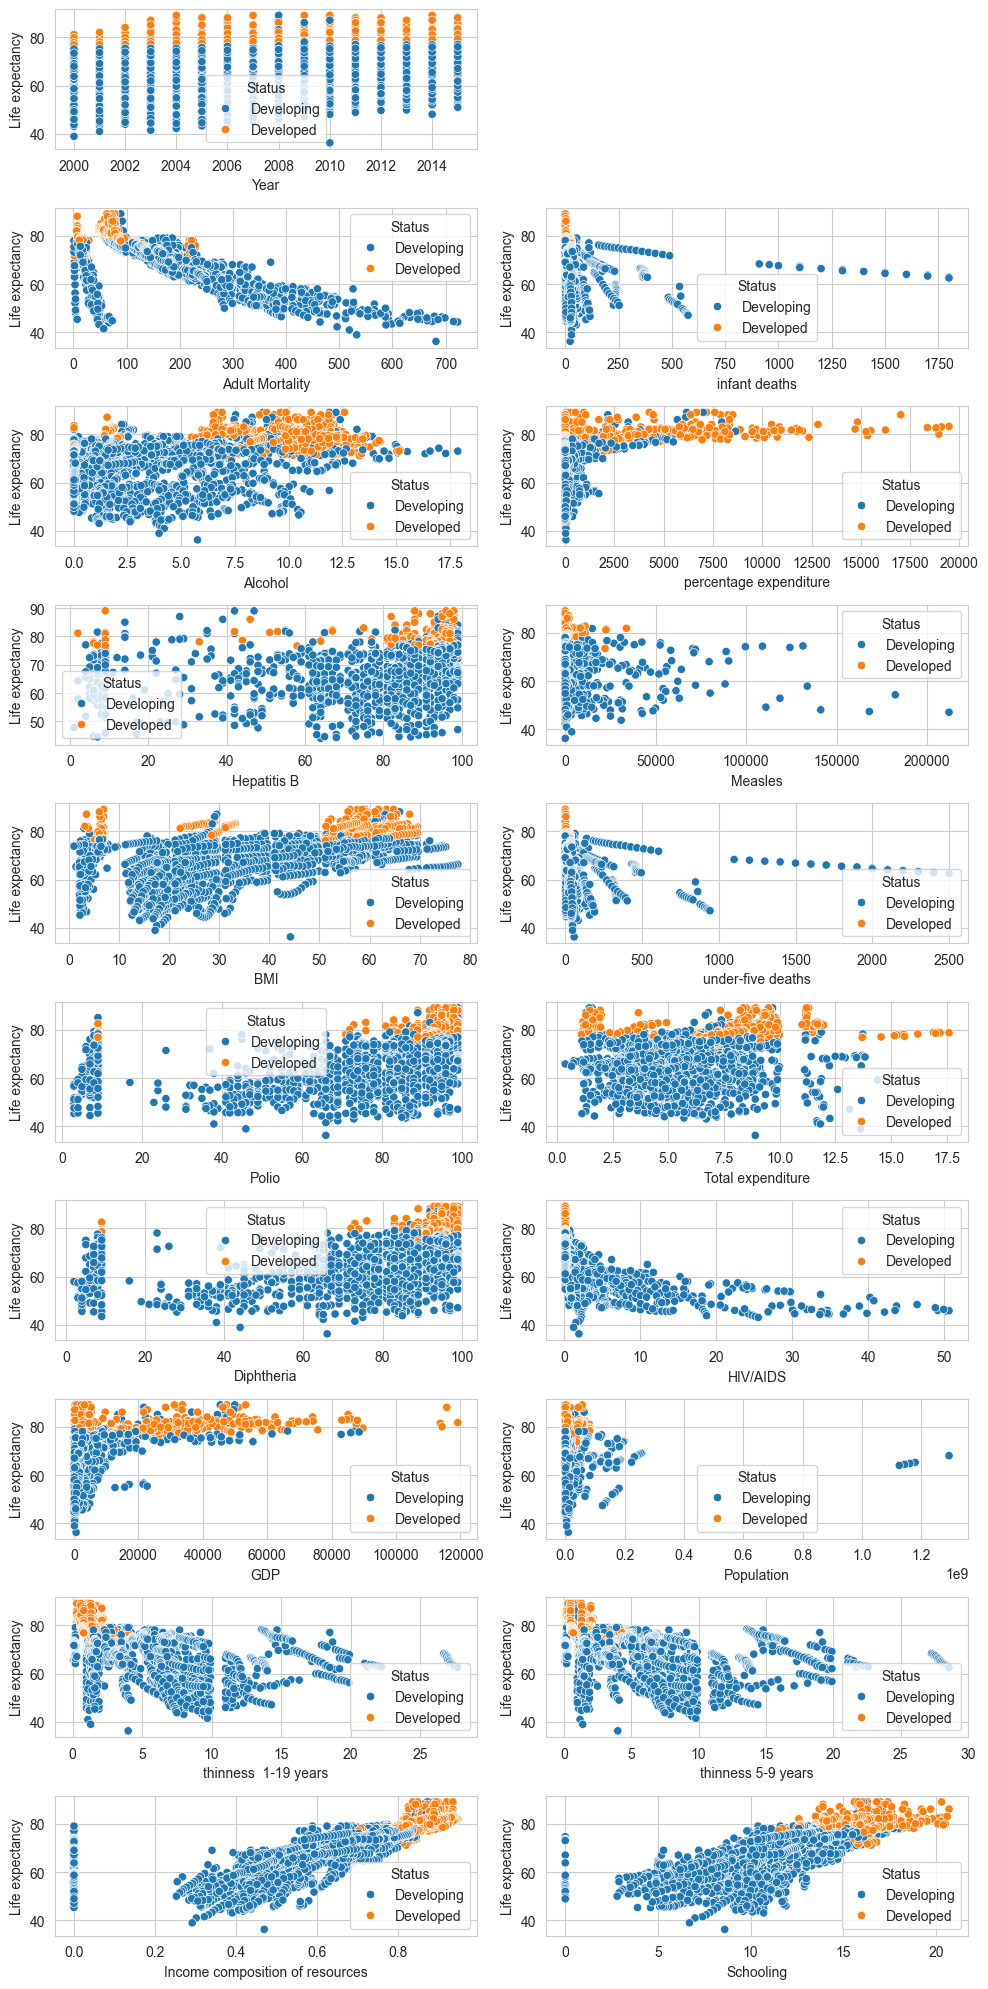

In [5]:
plt.figure(figsize=(10, 20))
for i, col in enumerate(numeric_cols):
    if (col != "Life expectancy"):
        plt.subplot(10, 2, i + 1)
        sns.scatterplot(df, x=col, y="Life expectancy", hue="Status", legend="auto")
plt.tight_layout()
plt.show()

``` {markdown}
Remark:
- State what you see in the chart
    + Life Expectancy vs. Year: Shows relatively stable life expectancy over time, with a slight increase for developed countries.
    + Life Expectancy vs. Adult Mortality: Displays a clear negative correlation. As adult mortality increases, life expectancy decreases. This relationship appears to be linear and strong.
    + Life Expectancy vs. Infant Deaths: Similar to adult mortality, a negative correlation is evident, albeit with a more scattered distribution.
    + Life Expectancy vs. Alcohol Consumption: No clear linear relationship is visible. Data is scattered broadly across the alcohol consumption spectrum.
    + Life Expectancy vs. Percentage Expenditure: Shows a positive trend; as the percentage of health expenditure increases, so does life expectancy, though the relationship is not strongly linear.
    + Life Expectancy vs. Hepatitis B Vaccination Coverage: Displays a slight positive trend, particularly among developed countries as vaccination coverage increases.
    + Life Expectancy vs. BMI: Shows a moderate positive correlation, particularly evident in developed countries. Higher BMI is associated with higher life expectancy up to a point.
    + Life Expectancy vs. Measles Cases: Shows no clear relationship. The data is broadly dispersed.
    + Life Expectancy vs. Under-Five Deaths: Exhibits a negative correlation similar to infant deaths, indicating lower life expectancy with higher under-five death rates.
    + Life Expectancy vs. Polio Vaccination Coverage: Shows a moderate positive correlation, especially in developed countries.
    + Life Expectancy vs. Diphtheria Vaccination Coverage and Total Expenditure: Both show moderate positive correlations with life expectancy.
    + Life Expectancy vs. HIV/AIDS Prevalence: Displays a negative correlation. Higher HIV/AIDS prevalence is associated with lower life expectancy.
    + Life Expectancy vs. GDP: Shows a positive correlation; countries with higher GDP tend to have higher life expectancy.
    + Life Expectancy vs. Population: Scatter is quite wide with no clear linear correlation visible.
    + Life Expectancy vs. Thinness in Children Aged 1-19 and 5-9 Years: Negative correlations are visible, with more pronounced thinness associated with lower life expectancy.
    + Life Expectancy vs. Income Composition of Resources and Schooling: Both show strong positive correlations. Higher income composition and more years of schooling are associated with higher life expectancy.

- Base on the scatter plot can you spot any variables that seem to have a linear relationship with the target variable?
Based on these plots, the variables that show a linear relationship with life expectancy and are most prominent include Adult Mortality, GDP, Schooling, Income Composition of Resources, and to a lesser extent, health expenditure and vaccination coverages. These factors appear to have a direct and significant influence on life expectancy, making them critical indicators for health and development studies.
```

### Overall statistic
- Life Expectancy: Average is around 69 years but varies widely influenced by health, economic, and educational factors.
- Health Metrics: Both adult and infant mortality rates show significant impact on life expectancy, with data suggesting that lower mortality rates correlate with higher life expectancy.
- Economic Factors: GDP per capita and percentage expenditure on health significantly influence life expectancy, emphasizing the importance of economic stability and health investment.
- Social Factors: Higher income resources and more years of schooling are strongly associated with higher life expectancy, highlighting the socio-economic foundations of health.

In [6]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2928.0000,69.2249,9.5239,36.3000,63.1000,72.1000,75.7000,89.0000
Adult Mortality,2928.0000,164.7964,124.2921,1.0000,74.0000,144.0000,228.0000,723.0000
infant deaths,2938.0000,30.3039,117.9265,0.0000,0.0000,3.0000,22.0000,1800.0000
Alcohol,2744.0000,4.6029,4.0524,0.0100,0.8775,3.7550,7.7025,17.8700
percentage expenditure,2938.0000,738.2513,1987.9149,0.0000,4.6853,64.9129,441.5341,19479.9116
Hepatitis B,2385.0000,80.9405,25.0700,1.0000,77.0000,92.0000,97.0000,99.0000
Measles,2938.0000,2419.5922,11467.2725,0.0000,0.0000,17.0000,360.2500,212183.0000
BMI,2904.0000,38.3212,20.0440,1.0000,19.3000,43.5000,56.2000,87.3000
under-five deaths,2938.0000,42.0357,160.4455,0.0000,0.0000,4.0000,28.0000,2500.0000


## Data preprocessing (NAs, outliers, duplicateds, label encoding)

### Missing

In [7]:
print("\nPreprocessing\n")
print(df.isna().sum())
df = df.interpolate(method='linear', limit_direction='forward')
print("\nPostprocessing\n")
print(df.isna().sum())


Preprocessing

Country                              0
Year                                 0
Status                               0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
BMI                                 34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
HIV/AIDS                             0
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

Postprocessing

Country                            0
Year                               0
Status                

C:\Users\Hii\AppData\Local\Temp\ipykernel_16868\2977670138.py:3: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  df = df.interpolate(method='linear', limit_direction='forward')


### Duplicated

In [8]:
print(f"Total duplicated values: {df.duplicated().sum()}")

Total duplicated values: 0


### Outliers

#### Detect outliers

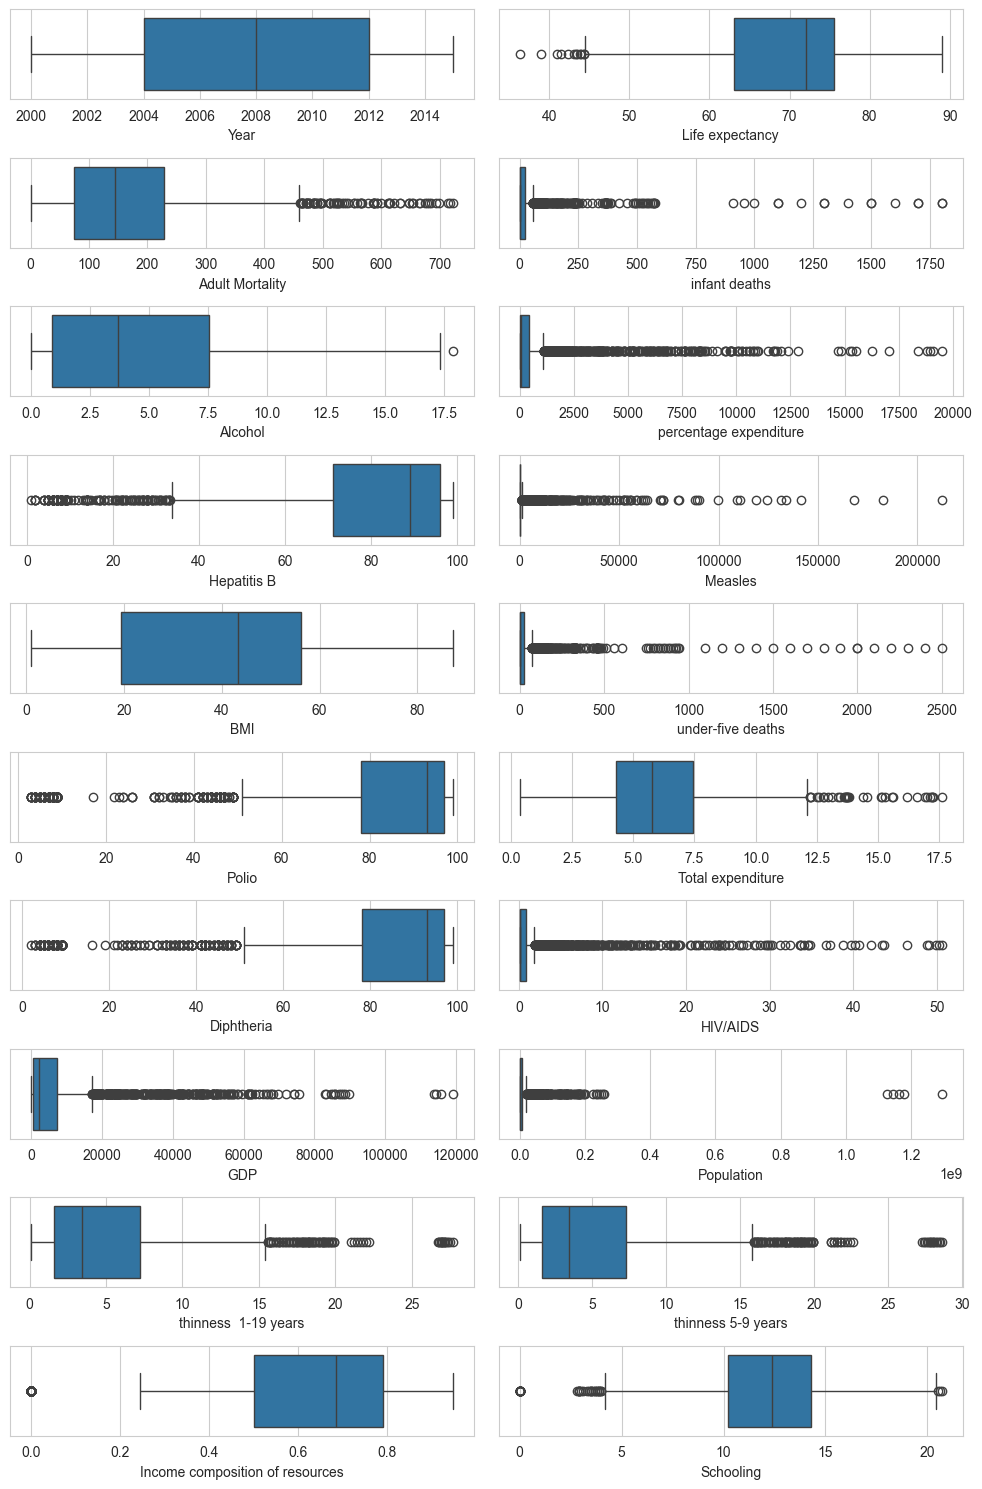

,Total outliers
Year,0
Life expectancy,12
Adult Mortality,82
infant deaths,315
Alcohol,1
percentage expenditure,389
Hepatitis B,248
Measles,542
BMI,0
under-five deaths,394


In [9]:
plt.figure(figsize=(10, 15))
for i, col in enumerate(numeric_cols):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df, x=col)
plt.tight_layout()
plt.show()

# detect outliers
def detectOutliers(data):
    outliers_arr = []
    for col in data.columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data[(data[col] < lower_bound) | (data[col] > upper_bound)][col].count()
        outliers_arr.append(outliers)
    return pd.DataFrame(outliers_arr, index=data.columns, columns=["Total outliers"])

numeric_data = df.drop(columns=["Status", "Country"], axis=1)
outliers = detectOutliers(numeric_data)
outliers

``` {markdonw}
Why we should not use variable with high outliers -> because regression can heavily be affected by these outliers, hence we should only choose those with low outliers
Potential variable for regression of target
- Year
- Adult Mortality
- Alcohol
- BMI
- Total expenditure
- thinness 1-19 years
- thinness 5-9 years
- Income composition of resources
- Schooling
```

#### Dealing with outliers

,Total outliers
Year,0
Life expectancy,48
Adult Mortality,18
Alcohol,0
BMI,0
Total expenditure,46
thinness 1-19 years,16
thinness 5-9 years,16
Income composition of resources,130
Schooling,107


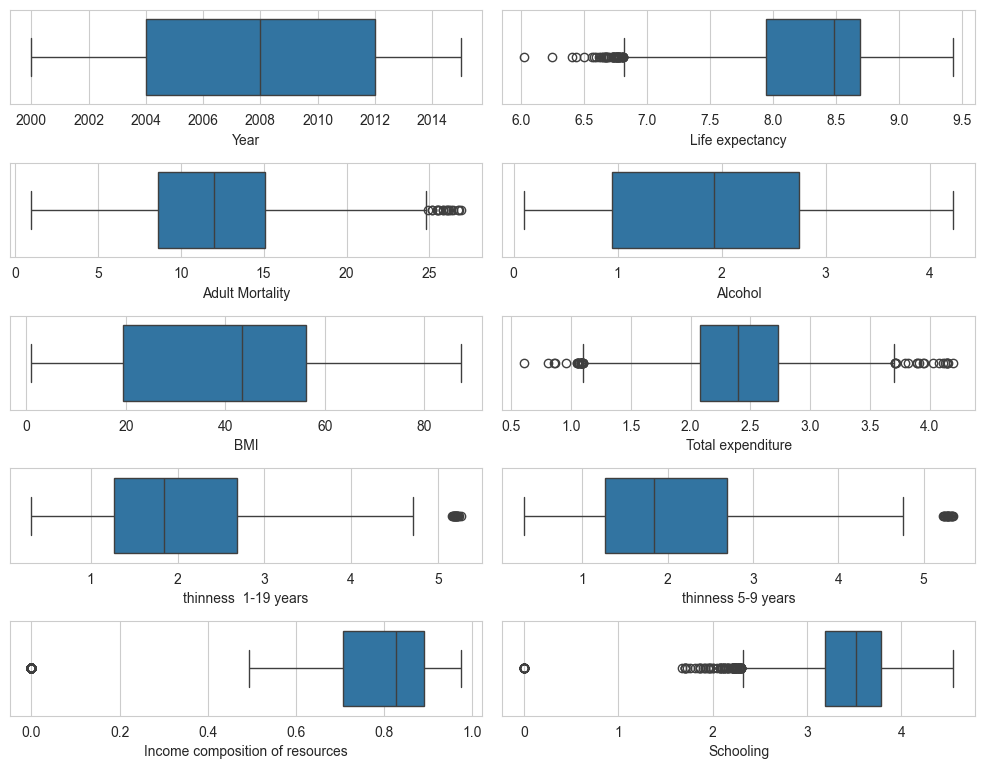

In [10]:
# get potentital variables and variables that have outliers
potential_var = outliers[(outliers["Total outliers"] < 150)].index
outliers_var = outliers[(outliers["Total outliers"] > 0) & (outliers["Total outliers"] < 150)].index

# using transformation to deal with outliers
df_outliers = df.copy()
for col in outliers_var:
    # df_outliers[col] = np.log1p(df_outliers[col])
    df_outliers[col] = np.sqrt(df_outliers[col])

# detect outliers again
numeric_outliers= df_outliers[potential_var]
outliers = detectOutliers(numeric_outliers)
display(outliers)

# plot outliers
plt.figure(figsize=(10, 15))
for i, col in enumerate(potential_var):
    plt.subplot(10, 2, i + 1)
    sns.boxplot(df_outliers, x=col)
plt.tight_layout()
plt.show()

# assign new dataframe to use for regression
df_regress = df_outliers[potential_var]

``` {markdown}
Remark
- Explain reason why we should not use variables that have many outliers
- Explain reason why we choose to use transformation and why is log (or anything else)
- Compare preprocessing and postprocessing
```

### Label encoding

Có cần thiết không?

### Comprare preprocess and postprocess

In [11]:
display(df[potential_var].describe().T)
display(df_regress.describe().T)

,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2938.0000,69.2149,9.5108,36.3000,63.1000,72.0000,75.6000,89.0000
Adult Mortality,2938.0000,164.7446,124.2266,1.0000,74.0000,144.0000,228.0000,723.0000
Alcohol,2938.0000,4.5502,3.9948,0.0100,0.9025,3.7025,7.5500,17.8700
BMI,2938.0000,38.2987,19.9914,1.0000,19.3250,43.2500,56.1000,87.3000
Total expenditure,2938.0000,5.9406,2.4457,0.3700,4.3125,5.7550,7.4400,17.6000
thinness 1-19 years,2938.0000,4.8823,4.4334,0.1000,1.6000,3.4000,7.2000,27.7000
thinness 5-9 years,2938.0000,4.9204,4.5325,0.1000,1.6000,3.4000,7.3000,28.6000
Income composition of resources,2938.0000,0.6344,0.2096,0.0000,0.5000,0.6840,0.7911,0.9480
Schooling,2938.0000,12.0752,3.3430,0.0000,10.2000,12.4000,14.3000,20.7000


,count,mean,std,min,25%,50%,75%,max
Year,2938.0000,2007.5187,4.6138,2000.0000,2004.0000,2008.0000,2012.0000,2015.0000
Life expectancy,2938.0000,8.2987,0.5890,6.0249,7.9436,8.4853,8.6948,9.4340
Adult Mortality,2938.0000,11.8344,4.9700,1.0000,8.6023,12.0000,15.0997,26.8887
Alcohol,2938.0000,1.8375,1.0836,0.1000,0.9500,1.9242,2.7477,4.2273
BMI,2938.0000,38.2987,19.9914,1.0000,19.3250,43.2500,56.1000,87.3000
Total expenditure,2938.0000,2.3823,0.5149,0.6083,2.0767,2.3990,2.7276,4.1952
thinness 1-19 years,2938.0000,1.9989,0.9417,0.3162,1.2649,1.8439,2.6833,5.2631
thinness 5-9 years,2938.0000,2.0007,0.9582,0.3162,1.2649,1.8439,2.7019,5.3479
Income composition of resources,2938.0000,0.7722,0.1952,0.0000,0.7071,0.8270,0.8894,0.9737
Schooling,2938.0000,3.4260,0.5811,0.0000,3.1937,3.5214,3.7815,4.5497


``` {markdown}
Remark:
- State what you observe when compare the two tables
```

# Linear Regression Analysis

## Correlation Matrix

### Before dealing with outliers

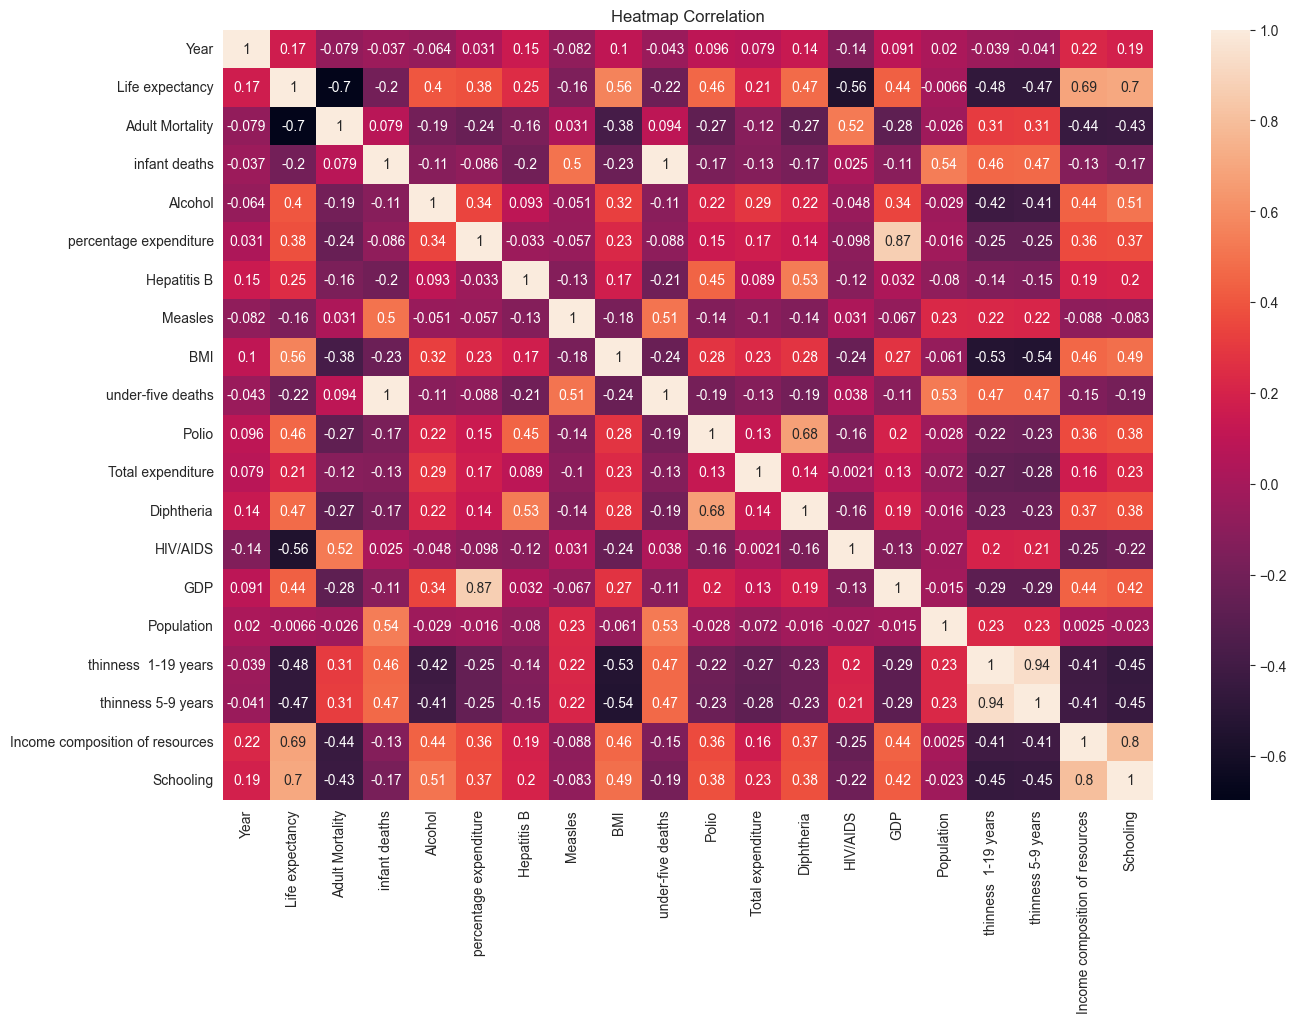

Variables have correlation larger than 0.5: 


Adult Mortality                   -0.6957
BMI                                0.5564
HIV/AIDS                          -0.5559
Income composition of resources    0.6909
Schooling                          0.7043
Name: Life expectancy, dtype: float64

In [12]:
numeric_df = df.drop(columns=["Country", "Status"])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df.corr(), annot=True)
plt.title('Heatmap Correlation')
plt.show()

# get variables that has high correlation with Life expectancy
corrs = numeric_df.corr()['Life expectancy'].drop('Life expectancy')
high_corr = corrs[corrs.abs() > 0.5]
print("Variables have correlation larger than 0.5: ")
high_corr

### After dealing with outliers

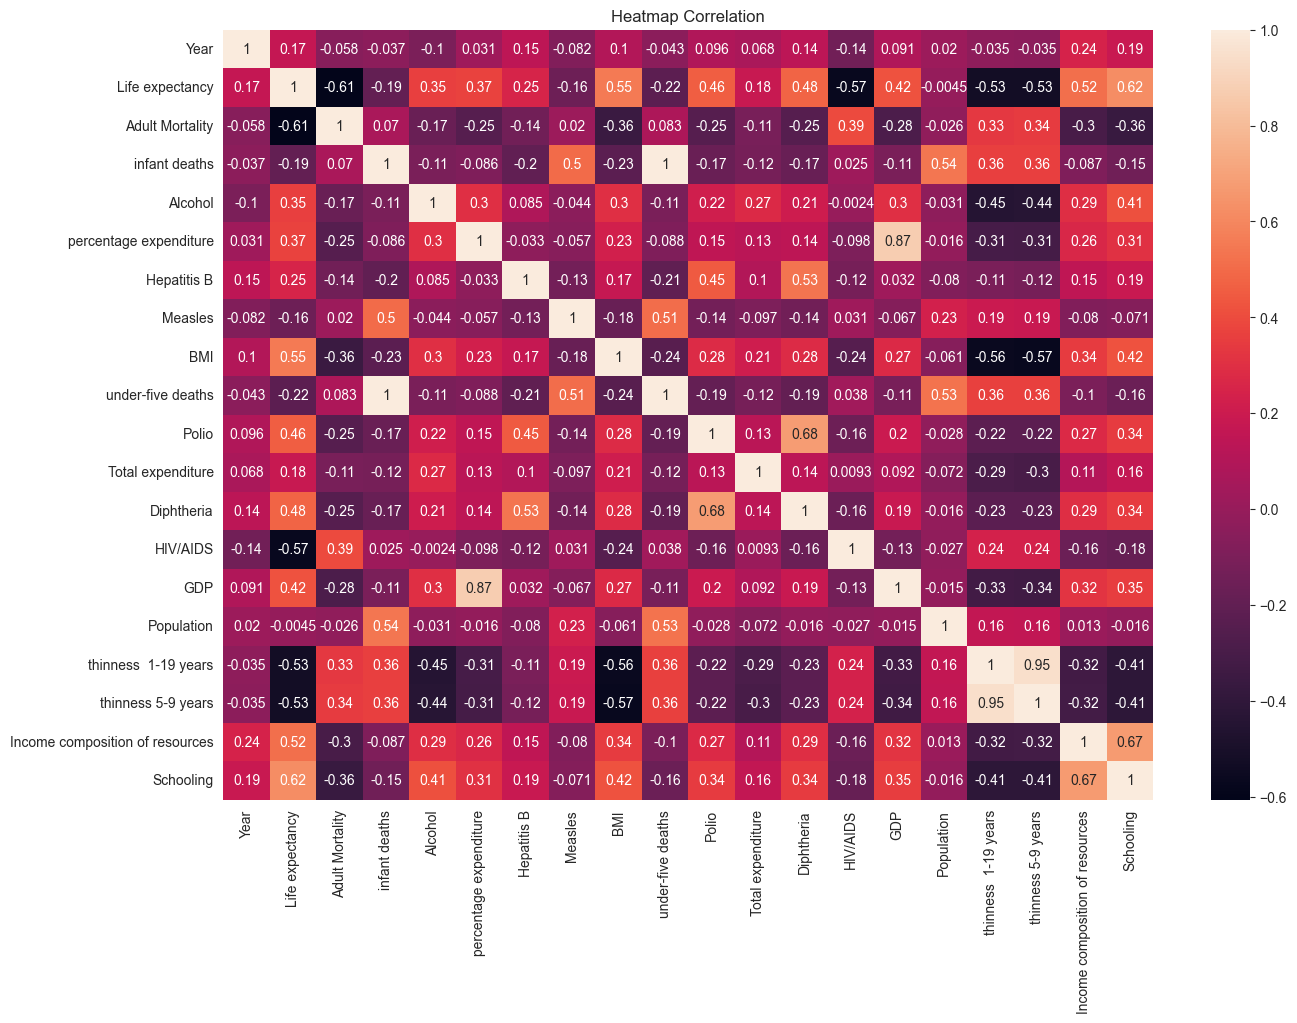

Variables have correlation larger than 0.5: 


Adult Mortality                   -0.6064
BMI                                0.5540
HIV/AIDS                          -0.5715
thinness  1-19 years              -0.5261
thinness 5-9 years                -0.5277
Income composition of resources    0.5161
Schooling                          0.6227
Name: Life expectancy, dtype: float64

In [13]:
numeric_df_outliers = df_outliers.drop(columns=["Country", "Status"])
plt.figure(figsize=(15, 10))
sns.heatmap(numeric_df_outliers.corr(), annot=True)
plt.title('Heatmap Correlation')
plt.show()

# get variables that has high correlation with Life expectancy
corrs = numeric_df_outliers.corr()['Life expectancy'].drop('Life expectancy')
high_corr = corrs[corrs.abs() > 0.5]
print("Variables have correlation larger than 0.5: ")
high_corr

``` {markdown}
Remark
- Base on qualitative analysis remark, outliers detection remark, and this correlation matix make the final conclusion on which variable we should use for linear regression of target
- If in outliers dealing part, we use log1p then the chossen are Income composition of resources, and Schooling
- However, if we use sqrt then the chossen are Adult Mortality, and Schooling
```

## Least square regression

``` {markdown}
Remark
```

## Check residuals for at least 4 assumptions